## CS454-Hw2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training_set = pd.read_csv("training.csv")
testing_set = pd.read_csv("testing.csv")

In [3]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PetalLengthCm  90 non-null     float64
 1   PetalWidthCm   90 non-null     float64
 2   Species        90 non-null     object 
dtypes: float64(2), object(1)
memory usage: 2.2+ KB


In [4]:
training_set.describe()

,PetalLengthCm,PetalWidthCm
count,90.000000,90.000000
mean,3.803333,1.202222
std,1.795778,0.756838
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.500000,1.400000
75%,5.075000,1.800000
max,6.900000,2.500000


In [5]:
training_set.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [6]:
classes = training_set.Species.unique()
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
mask1 = (training_set["Species"] == classes[0])
mask2 = (training_set["Species"] == classes[1])
mask3 = (training_set["Species"] == classes[2])
sample1 = training_set[mask1]
sample2 = training_set[mask2]
sample3 = training_set[mask3]

In [8]:
mask1_test = (testing_set["Species"] == classes[0])
mask2_test = (testing_set["Species"] == classes[1])
mask3_test = (testing_set["Species"] == classes[2])
sample1_test = testing_set[mask1_test]
sample2_test = testing_set[mask2_test]
sample3_test = testing_set[mask3_test]

In [9]:
def mean(x_list):
    length = 0.0
    width = 0.0
    count = 0
    for x in x_list.values:
        length += x[0] # PetalLengthCm
        width  += x[1] # PetalWidthCm
        count += 1
    return ((length / count), (width / count))

In [10]:
m1 = mean(sample1)
m2 = mean(sample2)
m3 = mean(sample3)
mu = [m1,m2,m3]
mu

[(1.4733333333333334, 0.24666666666666673),
 (4.333333333333333, 1.3533333333333333),
 (5.603333333333334, 2.006666666666666)]

In [11]:
m1_t = mean(sample1_test)
m2_t = mean(sample2_test)
m3_t = mean(sample3_test)
mu_t = [m1_t, m2_t, m3_t]
mu_t

[(1.45, 0.24000000000000005),
 (4.15, 1.2850000000000001),
 (5.4750000000000005, 2.0549999999999997)]

In [12]:
def plots():
    plt.figure(figsize=(14,10))
    plt.title("Instances Train")
    plt.xlabel("PetalLengthCm")
    plt.ylabel("PetalWidthCm")
    
    plt.plot(sample1["PetalLengthCm"], sample1["PetalWidthCm"], "x", markersize=8, color="red", label="Iris-setosa")
    plt.plot(sample2["PetalLengthCm"], sample2["PetalWidthCm"], "o", markersize=8, color="green", label="Iris-versicolor")
    plt.plot(sample3["PetalLengthCm"], sample3["PetalWidthCm"], "*", markersize=8, color="blue", label="Iris-virginica")

    plt.plot(m1[0], m1[1], "o", markersize=12, color="blue", label="Mean Setosa")
    plt.plot(m2[0], m2[1], "o", markersize=12, color="red", label="Mean Versicolor")
    plt.plot(m3[0], m3[1], "o", markersize=12, color="orange", label="Mean Virginica")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(14,10))
    plt.title("Instances Test")
    plt.xlabel("PetalLengthCm")
    plt.ylabel("PetalWidthCm")
    plt.plot(sample1_test["PetalLengthCm"], sample1_test["PetalWidthCm"], "x", markersize=8, color="red", label="Iris-setosa")
    plt.plot(sample2_test["PetalLengthCm"], sample2_test["PetalWidthCm"], "o", markersize=8, color="green", label="Iris-versicolor")
    plt.plot(sample3_test["PetalLengthCm"], sample3_test["PetalWidthCm"], "*", markersize=8, color="blue", label="Iris-virginica")
  
    plt.plot(m1_t[0], m1_t[1], "o", markersize=12, color="blue", label="Mean Setosa")
    plt.plot(m2_t[0], m2_t[1], "o", markersize=12, color="red", label="Mean Versicolor")
    plt.plot(m3_t[0], m3_t[1], "o", markersize=12, color="orange", label="Mean Virginica")
    plt.legend()
    plt.show()

## Nearest Mean Classifier

In [13]:
def convertToSpecies(li):
    list = []
    for i in li:
        if i == 1:
            list.append("Iris-setosa")
        elif i == 2:
            list.append("Iris-versicolor")
        else:
            list.append("Iris-virginica")
    return list

In [14]:
def convertToNum(li):
    list = []
    for i in li:
        if i == "Iris-setosa":
            list.append(1)
        elif i == "Iris-versicolor":
            list.append(2)
        else:
            list.append(3)
    return list

In [15]:
def accuracy(actuals, preds):
    sum = 0
    for i in range(len(actuals)):
        if(preds[i] != actuals[i]):
            sum += 1
    print("Accuracy: ",(len(actuals) -sum) /len(actuals))
    return (len(actuals) -sum) /len(actuals)

In [16]:
def conf_matrix(actuals, preds):
    n_diff_classes = len(list(set(actuals)))
    conf_mat = np.zeros((n_diff_classes, n_diff_classes)) # (rows=Preds, cols=Actuals)
    for i, j in zip(preds, actuals):
        conf_mat[int(i)-1, int(j)-1] += 1
    return conf_mat.astype("i")

In [17]:
def distance(data,i):
    return np.sqrt((mu[i][0] - data[0])**2 + (mu[i][1] - data[1])**2)

In [18]:
def nearest_mean(dataset, title):
    preds = []
    for data in dataset.values:
        liste = []
        for i in range(len(mu)):
            liste.append(distance(data,i))
        liste = np.array(liste)
        preds.append(liste.argmin() + 1)
    y_data = convertToNum(dataset["Species"])
    accuracy(y_data,preds)
    print(f"Confusion Matrix {title}")
    print(conf_matrix(y_data,preds))

## KNN

In [19]:
def find_majority(k):
    myMap = {}
    maximum = ( '', 0 )
    res = 0;
    for n in k:
        if n in myMap:
            myMap[n] += 1
        else: 
            myMap[n] = 1
            
        if myMap[n] > maximum[1]: 
            maximum = (n,myMap[n])
    return maximum

In [20]:
def knn(k, dataset, title):
    knn_pred = []
    for data in dataset.values:
        data_res = []
        for train in training_set.values:
            data_res.append(np.sqrt((data[0] - train[0])**2 + (data[1] - train[1])**2))
        data_res = np.array(data_res)
        data_frame = pd.DataFrame(data_res, columns=["distance"])
        data_frame = data_frame.sort_values(by="distance")
        k_class_idx = data_frame.iloc[:k].index.values  
        k_class = []
        for i in k_class_idx:
            k_class.append(training_set.loc[i]["Species"])
        knn_pred.append(find_majority(k_class)[0])
        preds = convertToNum(knn_pred)
        y_data = convertToNum(dataset["Species"])
    accs = accuracy(y_data,preds)
    print(f"K:{k} - Confusion Matrix {title}")
    print(conf_matrix(preds,y_data))
    return accs

In [21]:
def nem_res():
    nearest_mean(training_set,"(Train)")
    print("-"*25)
    nearest_mean(testing_set,"(Test)")

In [22]:
def knn_res():
    acc_list = []
    acc_list2 = []
    k = [1,3,5,7,9]
    print("\tTRAINING")
    for i in k:
        acc_list.append(knn(i,training_set,"(Train)"))
        print("-"*25)
    plt.figure(figsize=(10,6))
    plt.plot(k, acc_list, marker="o", label="Train")
    print("~"*15, "o", "~"*15)
    print("~"*15, "o", "~"*15)
    print("\tTESTING")
    for i in k:
        acc_list2.append(knn(i,testing_set,"(Test)"))
        print("-"*25)
    plt.plot(k, acc_list2, marker="o", label="Test")
    plt.title("KNN Accuracy Plot")
    plt.xlabel("K")
    plt.legend()
    plt.show()

# Results

### Instances

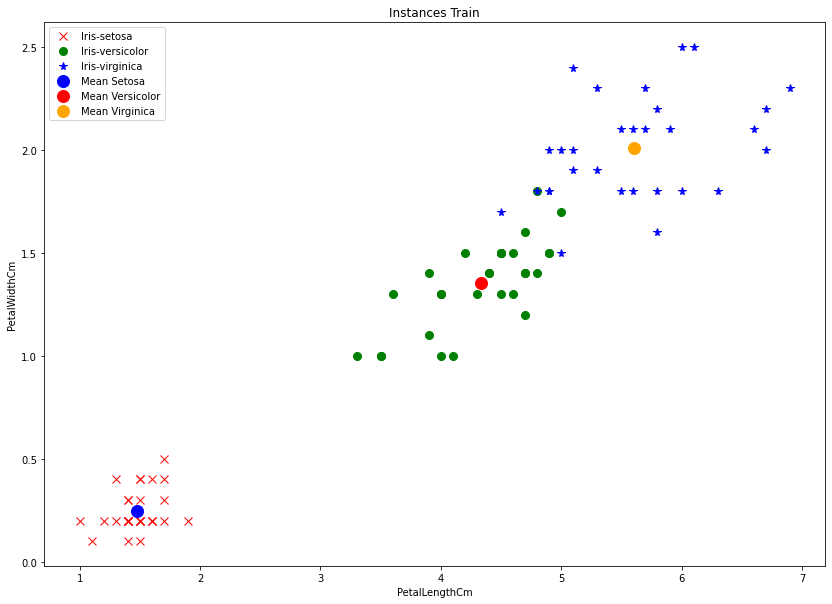

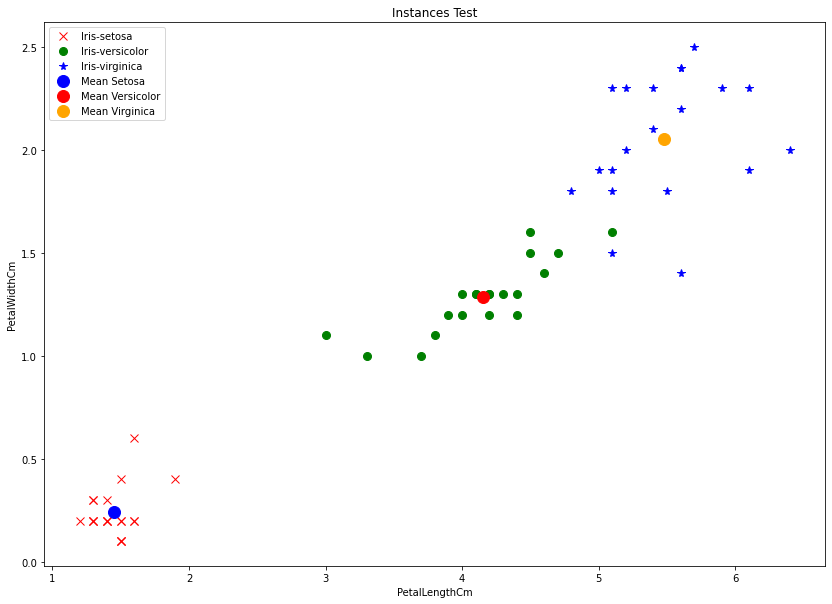

In [23]:
plots()

###  Nearest-Mean

In [24]:
nem_res()

Accuracy:  0.9333333333333333
Confusion Matrix (Train)
[[30  0  0]
 [ 0 29  5]
 [ 0  1 25]]
-------------------------
Accuracy:  0.9666666666666667
Confusion Matrix (Test)
[[20  0  0]
 [ 0 19  1]
 [ 0  1 19]]


### KNN

	TRAINING
Accuracy:  0.9888888888888889
K:1 - Confusion Matrix (Train)
[[30  0  0]
 [ 0 29  1]
 [ 0  0 30]]
-------------------------
Accuracy:  0.9555555555555556
K:3 - Confusion Matrix (Train)
[[30  0  0]
 [ 0 28  2]
 [ 0  2 28]]
-------------------------
Accuracy:  0.9555555555555556
K:5 - Confusion Matrix (Train)
[[30  0  0]
 [ 0 28  2]
 [ 0  2 28]]
-------------------------
Accuracy:  0.9555555555555556
K:7 - Confusion Matrix (Train)
[[30  0  0]
 [ 0 28  2]
 [ 0  2 28]]
-------------------------
Accuracy:  0.9555555555555556
K:9 - Confusion Matrix (Train)
[[30  0  0]
 [ 0 28  2]
 [ 0  2 28]]
-------------------------
~~~~~~~~~~~~~~~ o ~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~ o ~~~~~~~~~~~~~~~
	TESTING
Accuracy:  0.9833333333333333
K:1 - Confusion Matrix (Test)
[[20  0  0]
 [ 0 19  1]
 [ 0  0 20]]
-------------------------
Accuracy:  0.9833333333333333
K:3 - Confusion Matrix (Test)
[[20  0  0]
 [ 0 20  0]
 [ 0  1 19]]
-------------------------
Accuracy:  0.9833333333333333
K:5 - Confusion M

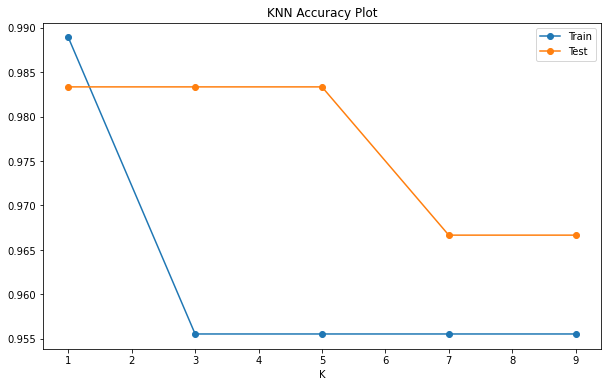

In [25]:
knn_res()